In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
from heatmap import HeatMap as hm
import h5py
import matplotlib.animation as animation
from simulation import individual_simulation as sim_
import matplotlib.gridspec as gridspec
import tensorflow as tf

2024-10-02 03:30:49.684884: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-02 03:30:49.769138: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-02 03:30:49.792122: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-02 03:30:49.903768: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-02 03:30:51.548190: W tensorflow/compiler/tf2

In [25]:
def cost_col(path, name, range_):
    cost = []
    time = []
    total_slices = 0
    num_cost = []
    data = h5py.File(path + name + f"{3}.h5", "r")
    target = data["target"][:]
    for i in range(range_[0], range_[1]):
        data = h5py.File(path + name + f"{i}.h5", "r")
        time.extend(data["time"])
        cost.extend(list(data["cost"]))
        num_cost.append(len(list(data["cost"])))
        data.close()

    res_ = np.zeros((len(cost), 100, 100))

    inx = 0
    h = 0
    #for j in range(range_[0], range_[1]):
        #data = h5py.File(path + name + f"{j}.h5", "r")
        #d, z, y, x = data["results"].shape
        #res_[inx:inx + num_cost[h], :, :] = data["results"][:num_cost[h], :, :] 
        #inx += num_cost[h]
        #h += 1
        #data.close()

    return cost, res_, target, time   

In [26]:
# check the files pathway
path = "/home/samani/Documents/projects/master_project/model/results/model_4/"
#file = h5py.File(path, "r")
ind = file["ind"][:]
#results = file["results"][:]
#print(file.keys())

In [27]:
# data extraction from the files
name = "rings"
cost, res_, target, time = cost_col(path=path, name=name, range_=(1, 8))

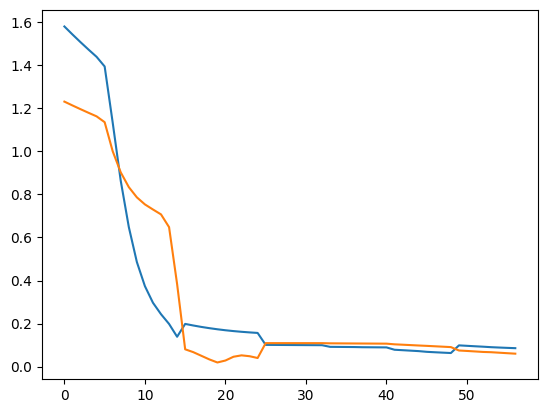

In [101]:
c1 = []
c2 = []
for i in range(57):
    c1.append(cost[i][0])
    c2.append(cost[i][1])


plt.plot(c1)
plt.plot(c2)

In [65]:
res_ = []
for i in range(1, 8, 1):
    file = h5py.File(path+f"rings{i}.h5", "r")
    res_.append(file["results"])

# Selecting subsets of each result
r = [] 
r.append(res_[0][:, :5, :, :])
r.append(res_[1][:, :10, :, :])
r.append(res_[2][:, :10, :, :])
r.append(res_[3][:, :8, :, :])
r.append(res_[4][:, :8, :, :])
r.append(res_[5][:, :8, :, :])
r.append(res_[6][:, :8, :, :])

# Initialize an array to store the combined results
g = np.zeros((2, 57, 100, 100))  # 57 is the total time steps from all r[i]

count = 0  # Starting position in the g array for time steps
for i in range(len(r)):
    # Determine the number of time steps for the current r[i]
    num_time_steps = r[i].shape[1]
    
    # Assign the result to g, using cumulative count for the slice
    g[:, count:count + num_time_steps, :, :] = r[i]
    
    # Update the count by the number of time steps just added
    count += num_time_steps



In [68]:
print(g[-1, 0, :, :])
    

[[1.26907143 1.35502622 1.02338464 ... 0.98690478 0.7188255  0.97838418]
 [1.13098183 0.82437619 0.88966114 ... 0.78957124 0.49638294 0.97239871]
 [1.34745481 1.28345024 1.14847887 ... 0.50742212 0.42839737 0.57584614]
 ...
 [0.59373846 0.81619867 1.1239565  ... 0.55940598 0.76114372 0.61716043]
 [0.52199541 0.9724359  1.07487916 ... 0.72365303 0.82596491 0.94791346]
 [0.54383624 0.53815809 0.65995611 ... 1.11937962 0.81518303 0.49605109]]


<Axes: >

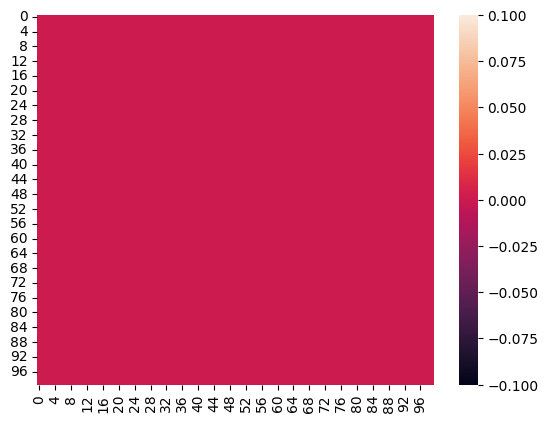

In [61]:
sns.heatmap(g[0, -2, :, :])

NameError: name 'data' is not defined

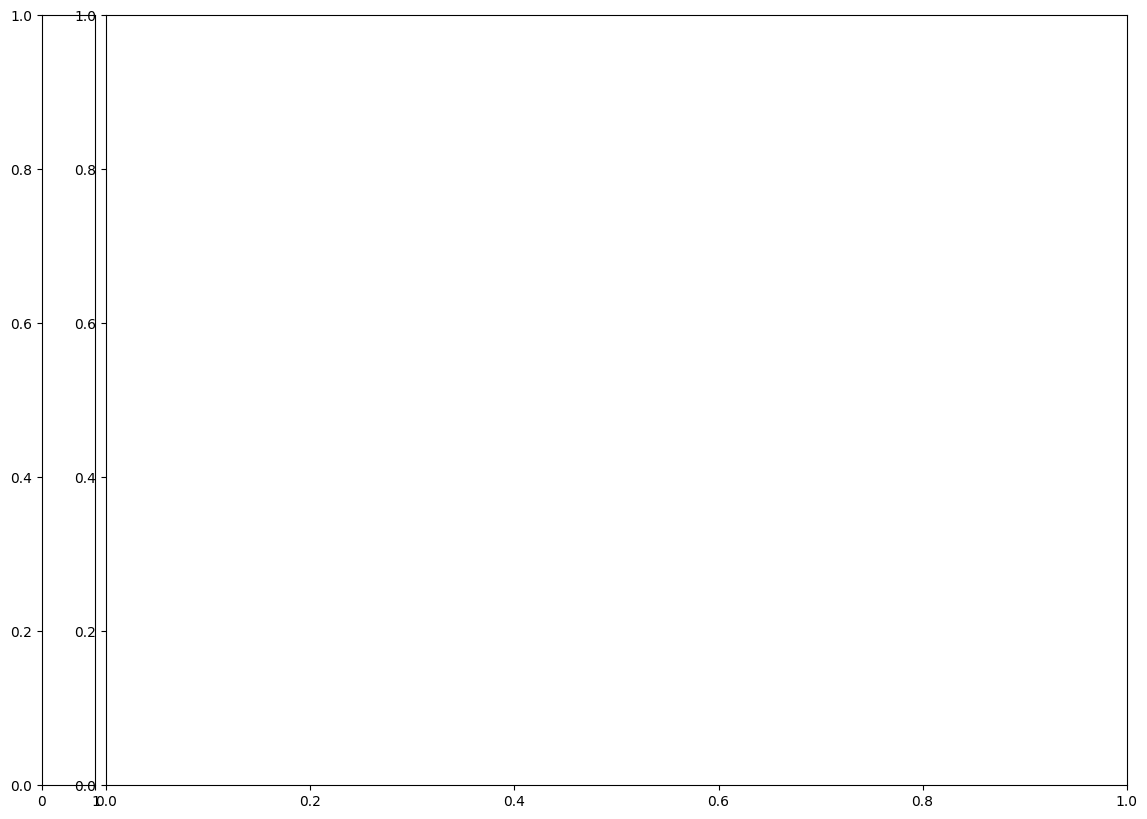

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec

# Create a figure with a specific layout
fig = plt.figure(figsize=(14, 10))
gs = gridspec.GridSpec(1, 2, width_ratios=[0.05, 0.95], wspace=0.02)

# Create the axes for the color bar (on the left) and the heatmap
cbar_ax = fig.add_subplot(gs[0])
heatmap_ax = fig.add_subplot(gs[1])

# Plot the heatmap on the heatmap_ax with the color bar on the cbar_ax
sns.heatmap(data["target"][0], cmap="inferno", ax=heatmap_ax, 
            cbar=True, cbar_ax=cbar_ax, cbar_kws={"aspect": 10, "pad": 0.01})

# Remove the axes for a cleaner look
heatmap_ax.axis('off')
cbar_ax.yaxis.set_ticks_position('left')

# Save the figure
#plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_4/target1.png")
plt.show()
plt.clf()


"""
# target heatmap (inferno, plasma, cividis, viridis, magma and hot)
plt.figure(figsize=(14, 10))
sns.heatmap(data["target"][0], cmap="inferno", cbar_kws={"aspect": 10, "pad": 0.01})
plt.axis('off')
plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_4/target1.png")
plt.show()
plt.clf()

plt.figure(figsize=(14, 10))
sns.heatmap(data["target"][1], cmap="plasma", cbar_kws={"aspect": 10, "pad": 0.01})
plt.axis('off')
plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_4/target2.png")
plt.show()
plt.clf()


plt.figure(figsize=(10, 10))
sns.heatmap(data["y_hat"][0, -1, :, :], cmap="inferno", cbar=False)
plt.axis('off')
plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_4/y_hat1.png")
plt.show()
plt.clf()

plt.figure(figsize=(10, 10))
sns.heatmap(data["y_hat"][1, -1, :, :], cmap="plasma", cbar=False)
plt.axis('off')
plt.savefig("/home/samani/Documents/projects/master_project/model/results/model_4/y_hat2.png")
plt.show()
plt.clf()
"""

In [16]:
# cost cleaning
def moving_average(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')
sm_ = moving_average(c_final, window_size=5)

245


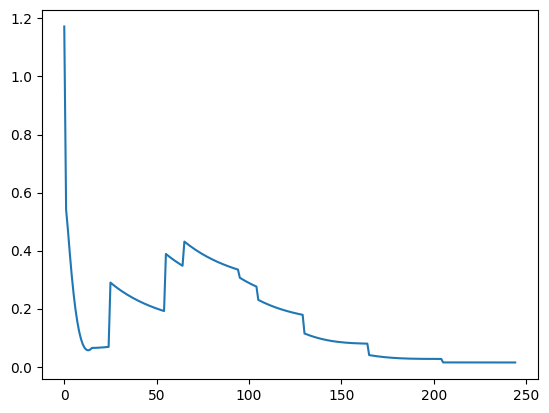

In [62]:
c1 = cost[:3]
c2 = cost[68:]
c_final = c1 + c2
plt.plot(cost)
print(len(cost))

(245, 100, 100)


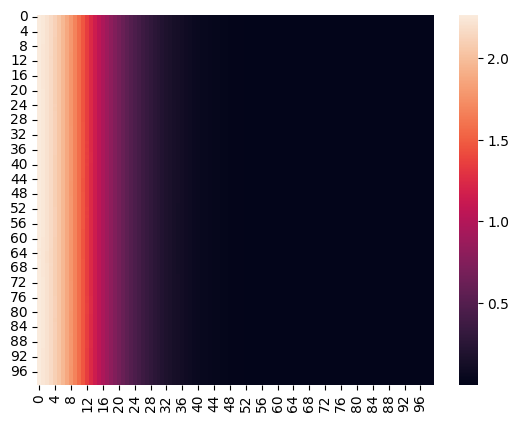

In [36]:
sns.heatmap(res_[-1, :, :])
print(res_.shape)

In [13]:
# heat map video
def generate_heatmap_video(results, cmap='plasma', save_path='heatmap_video.mp4', dpi=300, fps=10, bitrate=2000,
                           cbar_shrink=0.8, cbar_aspect=20, cbar_pad=0.01):
    iterations, y, x = results.shape
    fig = plt.figure(figsize=(10, 8), dpi=dpi)
    gs = gridspec.GridSpec(1, 2, width_ratios=[1, 0.02], wspace=0.02)
    ax = fig.add_subplot(gs[0, 0]) 
    cbar_ax = fig.add_subplot(gs[0, 1])
    cax = ax.imshow(results[0, :, :], cmap=cmap, vmin=np.min(results), vmax=np.max(results))
    fig.colorbar(cax, cax=cbar_ax, shrink=cbar_shrink, aspect=cbar_aspect, pad=cbar_pad)

    ax.set_xticks([])
    ax.set_yticks([])

    def update(i):
        cax.set_data(results[i, :, :])
        ax.set_title(f"Iteration {i}")
        
    ani = animation.FuncAnimation(fig, update, frames=iterations, repeat=False)
    ani.save(save_path, writer='ffmpeg', fps=fps, bitrate=bitrate, dpi=dpi)

    plt.close()

In [15]:
generate_heatmap_video(data["y_hat"][1, :, :, :], cmap='plasma', save_path='heatmap2.mp4', dpi=500, fps=3, bitrate=5000,
                           cbar_shrink=0.8, cbar_aspect=10, cbar_pad=0.1)

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import matplotlib.gridspec as gridspec

def generate_heatmap_video_dual(results1, results2, cmap1='inferno', cmap2='plasma', save_path='heatmap_video.mp4',
                                dpi=300, fps=3, bitrate=5000, cbar_shrink=1, cbar_aspect=10, cbar_pad=0.1):
    # Ensure both result arrays have the same shape for proper overlay
    assert results1.shape == results2.shape, "Results must have the same shape."

    iterations, y, x = results1.shape

    # Create a figure and grid spec layout for the heatmaps and colorbars
    fig = plt.figure(figsize=(14, 8), dpi=dpi)
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 0.02, 0.02], wspace=0.02)
    ax = fig.add_subplot(gs[0, 0]) 
    cbar_ax1 = fig.add_subplot(gs[0, 1])
    cbar_ax2 = fig.add_subplot(gs[0, 2])

    # Set up the heatmap for the first result set (results1)
    cax1 = ax.imshow(results1[0, :, :], cmap=cmap1, vmin=np.min(results1), vmax=np.max(results1), alpha=0.5)
    fig.colorbar(cax1, cax=cbar_ax1, shrink=cbar_shrink, aspect=cbar_aspect, pad=cbar_pad)

    # Overlay the heatmap for the second result set (results2) with a different colormap
    cax2 = ax.imshow(results2[0, :, :], cmap=cmap2, vmin=np.min(results2), vmax=np.max(results2), alpha=0.5)
    fig.colorbar(cax2, cax=cbar_ax2, shrink=cbar_shrink, aspect=cbar_aspect, pad=cbar_pad)

    # Remove axis ticks
    ax.set_xticks([])
    ax.set_yticks([])

    # Update function for each frame of the animation
    def update(i):
        # Update the data for both heatmaps
        cax1.set_data(results1[i, :, :])
        cax2.set_data(results2[i, :, :])
        ax.set_title(f"Iteration {i}")

    # Create the animation
    ani = animation.FuncAnimation(fig, update, frames=iterations, repeat=False)
    
    # Save the animation
    ani.save(save_path, writer='ffmpeg', fps=fps, bitrate=bitrate, dpi=dpi)

    plt.close()

# Call the function using both parts of g
generate_heatmap_video_dual(data["y_hat"][0, :, :, :], data["y_hat"][1, :, :, :],save_path='dual_.mp4',
                            dpi=300, fps=3, bitrate=5000, cbar_shrink=1, cbar_aspect=10, cbar_pad=0.1)


In [69]:
generate_heatmap_video(
    res_, cmap='hot', save_path='model_3.mp4',dpi=300, fps=10, bitrate=2000,
    cbar_shrink=0.8, cbar_aspect=0, cbar_pad=0.01)

In [2]:
data = h5py.File("/home/samani/Documents/projects/master_project/model/results/model_4/data.h5")
print(data.keys())

<KeysViewHDF5 ['accuracy', 'cost', 'ind', 'target', 'time', 'y_hat']>


In [45]:
print(res_.shape)

(245, 100, 100)


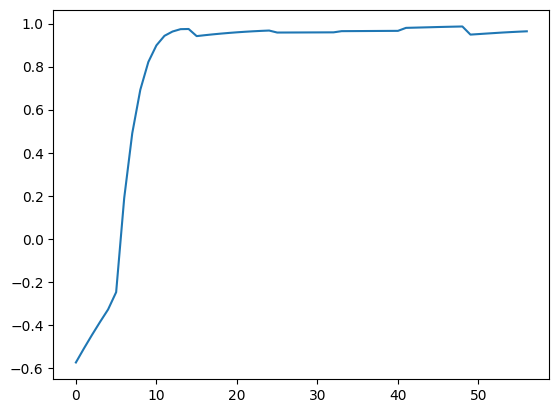

In [93]:
# calculate accuracies

acc1 = []
for i in range(57):
    mse = np.mean((g[0, i, :, :] - target[0]) ** 2)
    max_possible_error = 1 ** 2
    accuracy = 1 - mse / max_possible_error
    acc1.append(accuracy)
plt.plot(acc1)

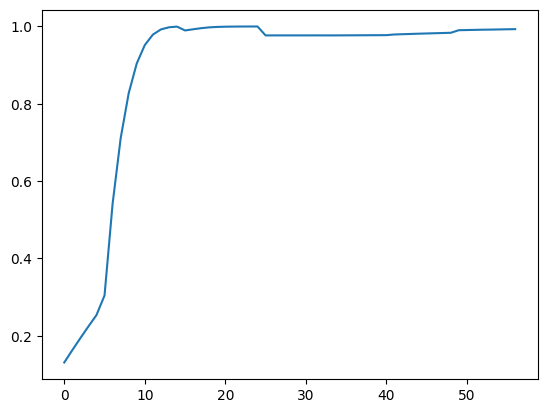

In [94]:
acc2 = []
for i in range(57):
    mse = np.mean((g[1, i, :, :] - target[1]) ** 2)
    max_possible_error = 1 ** 2
    accuracy = 1 - mse / max_possible_error
    acc2.append(accuracy)
plt.plot(acc2)

In [110]:
accc = np.zeros((2, 57))
for i in range(57):
    accc[0, i] = acc1[i]
    accc[1, i] = acc2[i]
    

In [78]:
# cost animation
def generate_cost_accuracy_animation(costs, accuracies, save_path='cost_accuracy_progression.gif', dpi=300, fps=10, bitrate=2000):
    
    fig, ax = plt.subplots(figsize=(16, 6), dpi=dpi)
    ax.set_xlim(-5, len(costs)+5)  
    ax.set_ylim(-.05, 1.2)
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Values")
    
    cost_line, = ax.plot([], [], lw=4, color='darkred', label="Cost") 
    accuracy_line, = ax.plot([], [], lw=4, color='gold', label="Accuracy")

    cost_point = ax.plot([], [], marker='o', color='darkred', markersize=10)[0]  
    accuracy_point = ax.plot([], [], marker='o', color='gold', markersize=10)[0]  

    title = ax.text(0.5, 1.2, '', transform=ax.transAxes, ha="center", fontsize=16)
    ax.legend(loc='upper right')

    def init():
        cost_line.set_data([], [])
        accuracy_line.set_data([], [])
        cost_point.set_data([], [])
        accuracy_point.set_data([], [])
        title.set_text('')
        return cost_line, accuracy_line, cost_point, accuracy_point, title

    def update(i):
        x = np.arange(i + 1) 
        cost_y = costs[:i + 1]  
        accuracy_y = accuracies[:i + 1] 
        cost_line.set_data(x, cost_y)
        accuracy_line.set_data(x, accuracy_y)
        cost_point.set_data(i, costs[i]) 
        accuracy_point.set_data(i, accuracies[i]) 
        title.set_text(f"Cost & Accuracy - {i}")
        return cost_line, accuracy_line, cost_point, accuracy_point, title

    ani = animation.FuncAnimation(fig, update, frames=len(costs), init_func=init, blit=True, repeat=False)
    ani.save(save_path, writer='ffmpeg', fps=fps)
    plt.close()

In [ ]:
generate_cost_accuracy_animation(cost, accuracies, save_path='cost_accuracy_progression1_.mp4')import numpy as np

In [23]:


def generate_cost_accuracy_animation1(costs1, accuracies1, costs2, accuracies2, 
                                     save_path='cost_accuracy_progression.gif', dpi=300, fps=3):
    
    fig, ax = plt.subplots(figsize=(10, 6), dpi=dpi)
    ax.set_xlim(-2, max(len(costs1), len(costs2))+2)  # Adjust x-axis to fit both cost arrays
    ax.set_ylim(-.05, 1.7)  # Adjust y-axis as needed
    ax.set_xlabel("Iterations")
    ax.set_ylabel("Values")
    
    # Line for Cost 1 and Accuracy 1
    cost_line1, = ax.plot([], [], lw=4, color='lightcoral', label="Cost 1") 
    accuracy_line1, = ax.plot([], [], lw=4, color='gold', label="Accuracy 1")

    # Line for Cost 2 and Accuracy 2
    cost_line2, = ax.plot([], [], lw=4, color='darkred', label="Cost 2")
    accuracy_line2, = ax.plot([], [], lw=4, color='darkorange', label="Accuracy 2")

    # Markers for the points
    cost_point1 = ax.plot([], [], marker='o', color='lightcoral', markersize=10)[0]  
    accuracy_point1 = ax.plot([], [], marker='o', color='gold', markersize=10)[0]  

    cost_point2 = ax.plot([], [], marker='o', color='darkred', markersize=10)[0]
    accuracy_point2 = ax.plot([], [], marker='o', color='darkorange', markersize=10)[0]

    title = ax.text(0.5, 1.2, '', transform=ax.transAxes, ha="center", fontsize=16)
    ax.legend(loc='upper right')

    def init():
        # Initialize empty lines and points
        cost_line1.set_data([], [])
        accuracy_line1.set_data([], [])
        cost_line2.set_data([], [])
        accuracy_line2.set_data([], [])
        cost_point1.set_data([], [])
        accuracy_point1.set_data([], [])
        cost_point2.set_data([], [])
        accuracy_point2.set_data([], [])
        title.set_text('')
        return cost_line1, accuracy_line1, cost_line2, accuracy_line2, cost_point1, accuracy_point1, cost_point2, accuracy_point2, title

    def update(i):
        # Define x values (iterations)
        x1 = np.arange(min(i + 1, len(costs1)))  # Ensure the array index doesn't exceed its length
        x2 = np.arange(min(i + 1, len(costs2)))

        # Update y values for each cost/accuracy array
        cost_y1 = costs1[:i + 1]
        accuracy_y1 = accuracies1[:i + 1]
        cost_y2 = costs2[:i + 1]
        accuracy_y2 = accuracies2[:i + 1]

        # Set data for cost/accuracy 1
        cost_line1.set_data(x1, cost_y1)
        accuracy_line1.set_data(x1, accuracy_y1)
        cost_point1.set_data(i, costs1[min(i, len(costs1) - 1)])  # Ensure the index doesn't exceed
        accuracy_point1.set_data(i, accuracies1[min(i, len(accuracies1) - 1)])  

        # Set data for cost/accuracy 2
        cost_line2.set_data(x2, cost_y2)
        accuracy_line2.set_data(x2, accuracy_y2)
        cost_point2.set_data(i, costs2[min(i, len(costs2) - 1)])  # Ensure the index doesn't exceed
        accuracy_point2.set_data(i, accuracies2[min(i, len(accuracies2) - 1)])

        title.set_text(f"Iteration {i}")
        return cost_line1, accuracy_line1, cost_line2, accuracy_line2, cost_point1, accuracy_point1, cost_point2, accuracy_point2, title

    # Create animation with the number of frames being the maximum length of the cost arrays
    max_frames = max(len(costs1), len(costs2))
    ani = animation.FuncAnimation(fig, update, frames=max_frames, init_func=init, blit=True, repeat=False)

    # Save the animation
    ani.save(save_path, writer='ffmpeg', fps=fps)
    plt.close()

# Example usage:
# costs1 = np.random.rand(100)
# accuracies1 = np.random.rand(100)
# costs2 = np.random.rand(120)
# accuracies2 = np.random.rand(120)
# generate_cost_accuracy_animation(costs1, accuracies1, costs2, accuracies2, save_path='dual_cost_accuracy.mp4')


In [27]:
generate_cost_accuracy_animation1(costs1=data["cost"][:,0], accuracies1=data["accuracy"][0,:], costs2=data["cost"][:,1], accuracies2=data["accuracy"][1,:],
                                  save_path='cost_accuracy.mp4')

/tmp/ipykernel_4575/2671636610.py:55: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  cost_point1.set_data(i, costs1[min(i, len(costs1) - 1)])  # Ensure the index doesn't exceed
/tmp/ipykernel_4575/2671636610.py:56: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  accuracy_point1.set_data(i, accuracies1[min(i, len(accuracies1) - 1)])
/tmp/ipykernel_4575/2671636610.py:61: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  cost_point2.set_data(i, costs2[min(i, len(costs2) - 1)])  # Ensure the index doesn't exceed
/tmp/ipykernel_4575/2671636610.py:62: MatplotlibDeprecationWarning: Setting data with a non sequence type is deprecated since 3.7 and will be remove two minor releases later
  accuracy_point2.set_data(i, accuracies2[m

In [26]:
print(data["accuracy"])
print(data["cost"])

<HDF5 dataset "accuracy": shape (2, 57), type "<f8">
<HDF5 dataset "cost": shape (57, 2), type "<f8">


In [112]:
# store the cleaned data
with h5py.File("/home/samani/Documents/projects/master_project/model/results/model_4/data.h5", 'a') as h5file:
    h5file.create_dataset("ind", data=ind)
    h5file.create_dataset("time", data=np.array(time))
    h5file.create_dataset("cost", data=np.array(cost))
    h5file.create_dataset("target", data=target)
    h5file.create_dataset("y_hat", data=g)
    h5file.create_dataset("accuracy", data=accc)
    